<a href="https://colab.research.google.com/github/schneider128k/machine_learning_course/blob/master/fashion_items_classification_dense_layers_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion items dataset

## Load and preprocess the MNIST fashion item dataset

In [0]:
%tensorflow_version 2.x
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

class_names = ['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Build, compile, and train the model

In [0]:
# build the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 10
history = model.fit(train_images, 
                    train_labels, 
                    epochs=epochs,  
                    validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.5018 - accuracy: 0.8228 - val_loss: 0.4726 - val_accuracy: 0.8228
Epoch 2/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.3775 - accuracy: 0.8645 - val_loss: 0.4034 - val_accuracy: 0.8514
Epoch 3/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3413 - accuracy: 0.8766 - val_loss: 0.3777 - val_accuracy: 0.8632
Epoch 4/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.3160 - accuracy: 0.8839 - val_loss: 0.3617 - val_accuracy: 0.8677
Epoch 5/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.2974 - accuracy: 0.8892 - val_loss: 0.3441 - val_accuracy: 0.8758
Epoch 6/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2835 - accuracy: 0.8955 - val_loss: 0.3445 - val_accuracy: 0.8765
Epoch 7/10
60000/60000 [==============================] 

## Show learning curves using pandas

The figure below shows the learning curves: mean training loss and accuracy measured over each epoch, and the mean validation loss and accuracy measured at the end of each epoch.

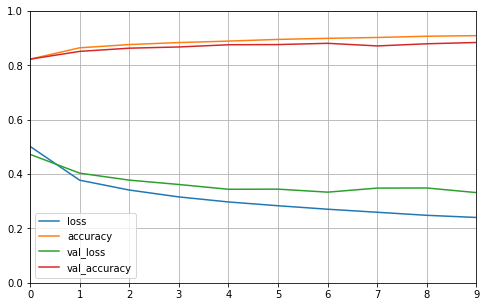

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0, 1]
plt.show()

## Evaluate accuracy

In [39]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 42us/sample - loss: 0.3318 - accuracy: 0.8842
Test accuracy: 0.8842


## Code for visually analyzing predictions

In [0]:
import pandas as pd

def get_predictions(images, labels):

    predictions = []

    for idx, pred_probs in enumerate(model.predict(test_images)):
        pred_label = np.argmax(pred_probs)
        pred_prob = np.max(pred_probs)
        predictions.append((labels[idx], pred_label, pred_prob))

    assert len(predictions) == len(test_labels)

    return pd.DataFrame(predictions, columns=['label', 'pred_label', 'pred_prob'])

In [0]:
def get_sorted_predictions(predictions,
                           label,
                           ascending=False,
                           num=10,
                           only_wrong_predictions=False):
    
    if only_wrong_predictions:
        return predictions[(predictions['label'] == label) & (predictions['pred_label'] != label)].sort_values(by=['pred_prob'], ascending=ascending).head(num)
    else:
        return predictions[predictions['label'] == label].sort_values(by=['pred_prob'], ascending=ascending).head(num)

In [0]:
def plot_images(predictions, images, message):
    plt.figure(figsize=(20, 15))
    columns = 5
    i = 0
    for idx, row in predictions.iterrows():
        ax = plt.subplot(len(predictions) / columns + 1, columns, i + 1)
        ax.set_title(f"prob: {round(row['pred_prob'], 4)}")
        plt.suptitle(message, fontsize=20, fontweight='bold')
        plt.axis('off')
        plt.imshow(images[idx])
        i += 1

In [0]:
num = 10

## Most confident predictions

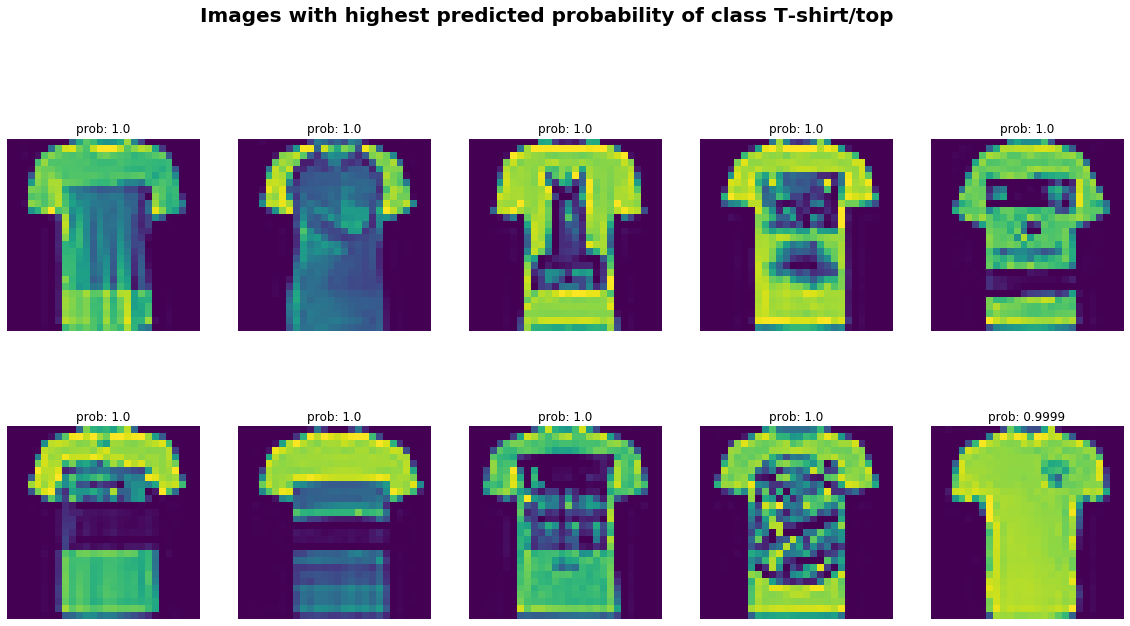

In [146]:
label = 0
plot_images(get_sorted_predictions(predictions, 
                                   ascending=False,
                                   label=label, 
                                   num=num, 
                                   only_wrong_predictions=False),
            test_images,
            message=f'Images with highest predicted probability of class {class_names[label]}')

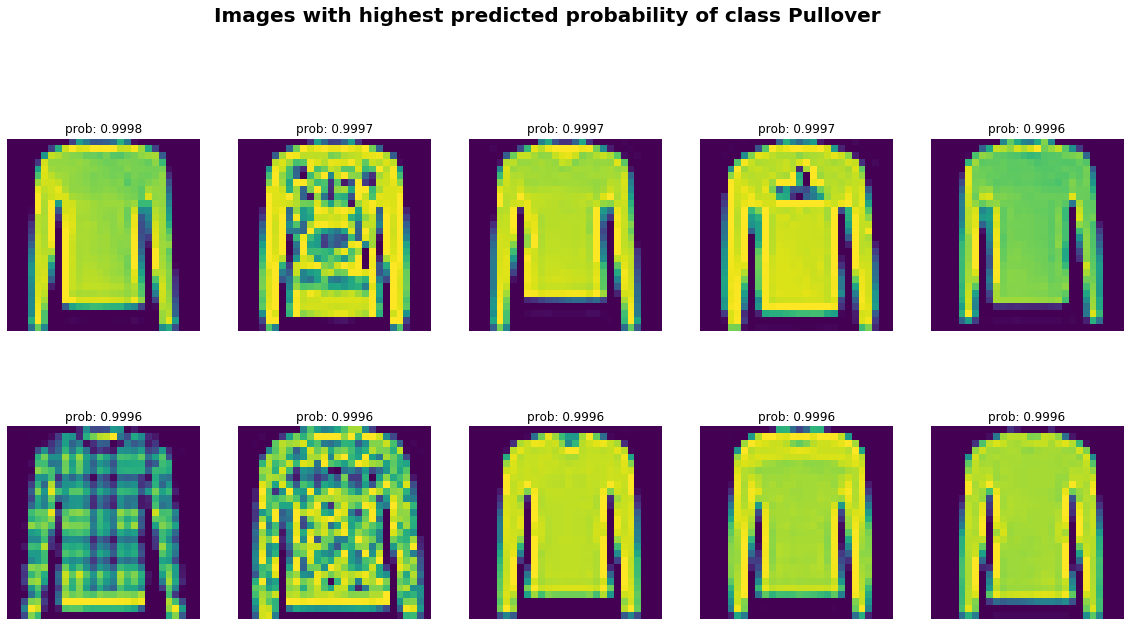

In [147]:
label = 2
plot_images(get_sorted_predictions(predictions, 
                                   ascending=False,
                                   label=label, 
                                   num=num, 
                                   only_wrong_predictions=False),
            test_images,
            message=f'Images with highest predicted probability of class {class_names[label]}')